# Binary 
## Introduction to Linear Programming

Computational environments provide organizations with the ability to implement solutions to complex time, in real time.  

[Scikit Learn, Pulp, CPLEX, and Gurobi](https://medium.com/opex-analytics/optimization-modeling-in-python-pulp-gurobi-and-cplex-83a62129807a) are  Python packages which provide capabilities for Linear programming and optimization. 


In [3]:
!pip install pulp

     |████████████████████████████████| 40.6MB 102kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amply: filename=amply-0.1.2-cp36-none-any.whl size=16573 sha256=ea3089f83544f413d979b49396eccd1dd55aa42f33c98960945a46b62d38cbd7
  Stored in directory: /root/.cache/pip/wheels/84/18/f7/e5c3ed13ed5bb721763f77d4a924331d59ef115ce61c9d26eb
Successfully built amply


In [19]:
#Import some required packages. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

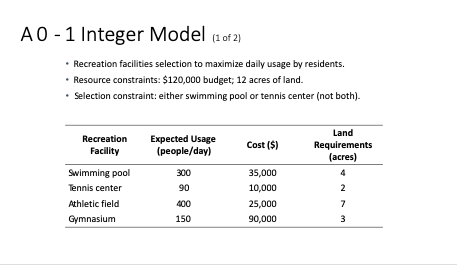


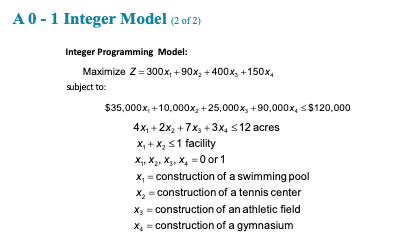

In [20]:
#Initialize the model as a minimization problem. 
import pulp as pl
opt_model = pl.LpProblem("MIPModel", pl.LpMaximize)


In [ ]:
pl.LpBinary

In [21]:
#Set the variables. Notice this is where we put 
# the "non-negativity" constraint
x1 =pl.LpVariable(cat=pl.LpBinary, lowBound=0, name="$x_{1}$") 
x2 =pl.LpVariable(cat=pl.LpBinary, lowBound=0, name="$x_{2}$")
x3 =pl.LpVariable(cat=pl.LpBinary, lowBound=0, name="$x_{3}$")  
x4 =pl.LpVariable(cat=pl.LpBinary, lowBound=0, name="$x_{4}$")  


In [22]:
#Set the objective function
opt_model += 300 * x1 + 90 * x2 +  400 * x3 + 150 * x4

In [23]:
#Set the Constraints
opt_model += x1  + x2  <= 1 

opt_model += 4 * x1 + 2 * x2 +  7 * x3 + 3 * x4  <= 12 

opt_model += 35000 * x1 + 10000 * x2 +  25000 * x3 + 90000 * x4  <= 120000 

## Review Model

Now that we have created the model we can review it. 

In [24]:
opt_model

MIPModel:
MAXIMIZE
300*$x_{1}$ + 90*$x_{2}$ + 400*$x_{3}$ + 150*$x_{4}$ + 0
SUBJECT TO
_C1: $x_{1}$ + $x_{2}$ <= 1

_C2: 4 $x_{1}$ + 2 $x_{2}$ + 7 $x_{3}$ + 3 $x_{4}$ <= 12

_C3: 35000 $x_{1}$ + 10000 $x_{2}$ + 25000 $x_{3}$ + 90000 $x_{4}$ <= 120000

VARIABLES
0 <= $x_{1}$ <= 1 Integer
0 <= $x_{2}$ <= 1 Integer
0 <= $x_{3}$ <= 1 Integer
0 <= $x_{4}$ <= 1 Integer

## Solve

We now solve the system of equations with the solve command. 

In [25]:
#Solve the program
opt_model.solve()


1

## Check the Status

Here are 5 status codes:
* **Not Solved**: Status prior to solving the problem.
* **Optimal**: An optimal solution has been found.
* **Infeasible**: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
* **Unbounded**: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
* **Undefined**: The optimal solution may exist but may not have been found.

In [26]:
pl.LpStatus[opt_model.status]

'Optimal'

In [27]:
for variable in opt_model.variables():
    print(variable.name," = ", variable.varValue)

$x_{1}$  =  1.0
$x_{2}$  =  0.0
$x_{3}$  =  1.0
$x_{4}$  =  0.0


## Hurray! 
We got the same answer as we did before. 

## Exercise

Solve the LP problem for Beaver Creek Pottery using the maximization model type (`pl.LpMaximize`).


### Product mix problem - Beaver Creek Pottery Company
How many bowls and mugs should be produced to maximize profits given labor and materials constraints?

Product resource requirements and unit profit:

Decision Variables:

$x_{1}$ = number of bowls to produce per day

$x_{2}$ = number of mugs to produce per day


Profit (Z)  Mazimization

Z = 40$x_{1}$ + 50$x_{2}$

Labor Constraint Check

1$x_{1}$ + 2$x_{2}$ <= 40

Clay (Physicial Resource) Constraint Check

4$x_{1}$ + 3$x_{2}$ <= 120

Negative Production Constaint Check

$x_{1}$ > 0

$x_{2}$ > 0



## Sensitivity Analysis

In [ ]:
for name, c in opt_model.constraints.items():
    print (name, ":", c, "\t", c.pi, "\t\t", c.slack)

_C1 : 2*$x_{1}$ + 4*$x_{2}$ >= 16 	 0.0 		 -16.0
_C2 : 4*$x_{1}$ + 3*$x_{2}$ >= 24 	 0.0 		 -0.0
